# Лабораторная работа №4: Обучение модели и бустинга, сравнение моделей

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# импортируем данные и поместим их в переменную cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Преобразуем данные в формат датафрейма
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target

# посмотрим на первые пять наблюдений
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = df.drop("target",axis=1)
y = df["target"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify = y)

In [ ]:
model_dict = {}

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
rf = RandomForestClassifier()
kf = KFold(n_splits=11)

for train, test in kf.split(X, y):
    rf.fit(X.iloc[train, :], y[train])
    y_pred = rf.predict(X.iloc[test, :])
    print(accuracy_score(y[test], y_pred) * 100)

92.3076923076923
94.23076923076923
92.3076923076923
96.15384615384616
98.07692307692307
96.15384615384616
98.07692307692307
96.15384615384616
98.0392156862745
96.07843137254902
98.0392156862745


In [ ]:
train, test = list(kf.split(X, y))[8]
X_train, y_train = X.iloc[train, :], y[train]
X_test , y_test = X.iloc[test, : ] , y[test]
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
ypred = rf.predict(X_test)
print("Accuracy_Score : ", accuracy_score(y_test,ypred)*100)
print("Precision_Score : ", precision_score(y_test,ypred)*100)
print("Recall_Score : ", recall_score(y_test,ypred))

Accuracy_Score :  100.0
Precision_Score :  100.0
Recall_Score :  1.0


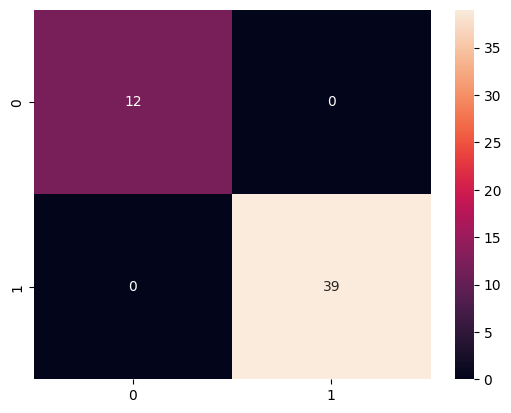

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test,ypred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
import random
from xgboost import XGBClassifier, plot_tree
from datetime import datetime
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import importlib

In [ ]:
classifier = XGBClassifier(random_state=42, eval_metric='logloss')
predictor_xgb = classifier.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
model_dict['xgboost_classifier'] = accuracy_xgb
print('Accuracy:', accuracy_xgb)

Accuracy: 1.0
